In [838]:
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot as plt
import numpy as np
from numpy import set_printoptions
import pandas as pd
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [839]:
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pressure', 'skin', 'test', 'bmi', 'pedi', 'age', 'class']
df = pd.read_csv(filename, names=names)

In [840]:
df.columns

Index(['preg', 'plas', 'pressure', 'skin', 'test', 'bmi', 'pedi', 'age',
       'class'],
      dtype='object')

In [841]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [842]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg        768 non-null int64
plas        768 non-null int64
pressure    768 non-null int64
skin        768 non-null int64
test        768 non-null int64
bmi         768 non-null float64
pedi        768 non-null float64
age         768 non-null int64
class       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [843]:
#we have class imbalance but not major
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [844]:
#no missing values
df.isna().sum()

preg        0
plas        0
pressure    0
skin        0
test        0
bmi         0
pedi        0
age         0
class       0
dtype: int64

In [845]:

features = ['bmi','age', 'pressure', 'skin','class']
df = df[features]

In [846]:
df.dtypes

bmi         float64
age           int64
pressure      int64
skin          int64
class         int64
dtype: object

In [847]:
#array = df.values
#X = array[:, 0:4].astype('float')
#y = array[:, 4].astype('int')

In [848]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
#from sklearn.feature_selection import chi2
#from sklearn.feature_selection import SelectKBest
# feature extraction
#test = SelectKBest(score_func=chi2, k=4)
#fit = test.fit(X, Y)
# summarize scores
#print(fit.scores_)
#X = fit.transform(X)
# summarize selected features
#print(X[0:5,:])

#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#indices = np.argsort(fit.scores_)[:4]
#features = [names[ind] for ind in indices]
#print(features)

#features = ['age', 'pres', 'skin', 'preg']

In [849]:
df_new = df[features] 
array = df_new.values
X = array[:, 0:4].astype('float')
y = array[:, 4].astype('int')
df_new.to_csv('diabetes_data.csv')

In [850]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [851]:
# Evaluate using a train and a test set
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed,stratify=y)
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train, y_train)
result = lr_model.score(X_test, y_test)
print("Accuracy: {:.2f}".format(result * 100.0))

predicted = lr_model.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)

# save the model to disk
filename = 'lr_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result*100)

Accuracy: 69.69
[[111  54]
 [ 23  66]]
69.68503937007874


In [852]:
from sklearn.externals import joblib
joblib.dump(lr_model, 'logit_model_iris.pkl')

['logit_model_iris.pkl']

In [853]:
# Reloading the Model
lr_model = joblib.load('logit_model_iris.pkl')

LR: 0.674487 0.050888
KNN: 0.662731 0.057873
DT: 0.598855 0.054526


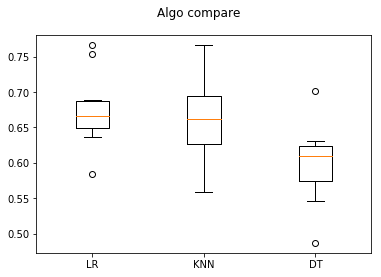

In [854]:
models = []
models.append(('LR',LogisticRegression(class_weight='balanced')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier(class_weight='balanced')))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state = 7)
    cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "{}: {:f} {:f}".format(name,cv_results.mean(),cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('Algo compare')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [855]:
lr = RandomForestClassifier(class_weight='balanced')
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(class_weight='balanced')

In [856]:
# Fit the model
lr.fit(X_train, y_train)
print("accuracy :" , lr.score(X_test,y_test))

accuracy : 0.6929133858267716


In [857]:
# save the model to disk
joblib.dump(lr, 'lr_model_diabetes.pkl')

['lr_model_diabetes.pkl']

In [858]:
# Fit the model
knn.fit(X_train, y_train)
print("accuracy :" , knn.score(X_test,y_test))

accuracy : 0.65748031496063


In [859]:
# save the model to disk
joblib.dump(knn, 'knn_model_diabetes.pkl')

['knn_model_diabetes.pkl']

In [860]:
# Fit the model
dt.fit(X_train, y_train)
print("accuracy :" , dt.score(X_test,y_test))

accuracy : 0.6023622047244095


In [861]:
# save the model to disk
joblib.dump(dt, 'dt_model_diabetes.pkl')

['dt_model_diabetes.pkl']